In [173]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [127]:
iris_dataset = load_iris()
dir(iris_dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [131]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [143]:
df = pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [144]:
df["target"]=iris_dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [145]:
df = df[df["target"]!=2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [146]:
df = df[["sepal length (cm)","target"]]

In [148]:
df

,sepal length (cm),target
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0
...,...,...
95,5.7,1
96,5.7,1
97,6.2,1
98,5.1,1


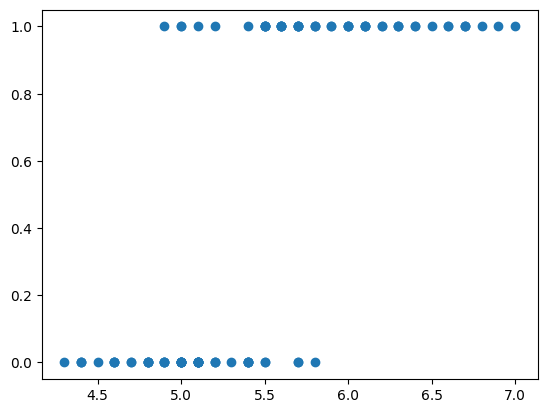

In [151]:
x = df[["sepal length (cm)"]]
y = df["target"]
plt.scatter(x.values,y)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.5)

In [171]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

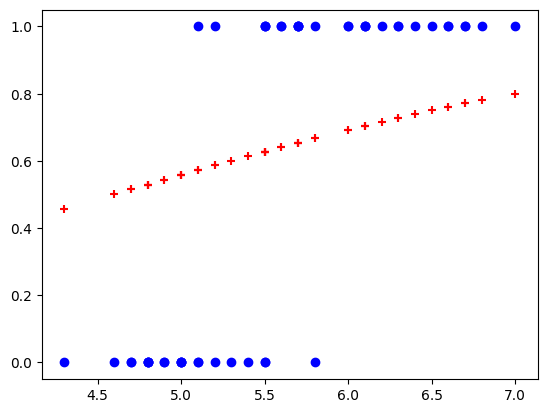

In [174]:
linear_reg = LinearRegression()
trained_model = linear_reg.fit(x_train,y_train)

coef_ = trained_model.coef_
intercept_ = trained_model.intercept_

preds = x_test.values*coef_ + intercept_
preds = sigmoid(preds)

plt.scatter(x_test.values,y_test.values,c="b")
plt.scatter(x_test.values,preds,c="r",marker="+")



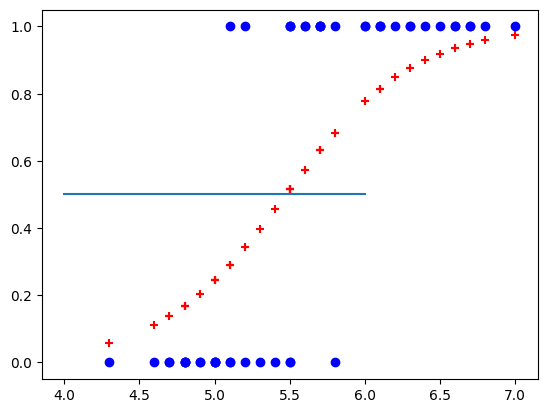

In [186]:
linear_reg = LogisticRegression()
trained_model = linear_reg.fit(x_train,y_train)

coef_ = trained_model.coef_
intercept_ = trained_model.intercept_

preds = x_test.values*coef_ + intercept_
preds = sigmoid(preds)

plt.scatter(x_test.values,y_test.values,c="b")
plt.scatter(x_test.values,preds,c="r",marker="+")
plt.plot(range(4,7),[.5 for i in range(4,7)])


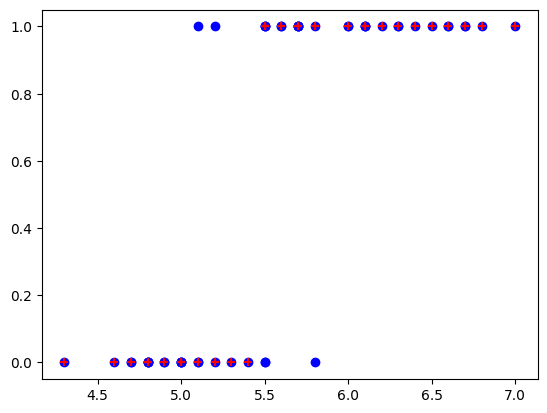

In [180]:
preds = trained_model.predict(x_test)
plt.scatter(x_test.values,y_test.values,c="b")
plt.scatter(x_test.values,preds,c="r",marker="+")